In [2]:
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
from biogeme.expressions import Beta, DefineVariable
# here is the documentation for Biogeme
# http://biogeme.epfl.ch/sphinx/index.html

In [3]:
data = pd.read_csv("trips.csv")
data.head()

,HTAZ,ID,OTAZ,DTAZ,SameZone,TourID,SampleNo,SamplewithOD,age1,age2,...,new,New,man,ox,oy,dx,dy,Departure hr,Departure min,Second
0,377,52,377,425,0,300040311,3000403,300040303770425,0,0,...,True,1,0,40.751531,-73.899838,40.736918,-73.876352,7,0,25200
1,377,53,425,377,0,300040311,3000403,300040304250377,0,0,...,False,0,0,40.736918,-73.876352,40.751531,-73.899838,15,0,54000
2,1607,174,1607,1607,1,300074912,3000749,300074916071607,0,1,...,True,1,0,40.561232,-74.145414,40.561232,-74.145414,17,0,61200
3,1607,175,1607,1607,1,300074912,3000749,300074916071607,0,1,...,True,1,0,40.561232,-74.145414,40.561232,-74.145414,17,0,61200
4,1607,176,1607,12,0,300074921,3000749,300074916070012,0,1,...,True,1,1,40.561232,-74.145414,40.708519,-74.007126,6,15,22500


In [4]:
data=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','Cost_carpool']].copy()
data=data.drop('pt_access',axis=1)

In [5]:
data['TT_Auto_scaled'] = data.TT_auto/3600
data['TT_Taxi_scaled'] = data.TT_Taxi/3600
data['TT_Walk_scaled'] = data.TT_Walk/3600
data['TT_Bike_scaled'] = data.TT_Bike/3600
data['TT_pt_scaled'] = data.TT_pt/3600
data['TT_carpool_scaled'] = data.TT_carpool/3600
data['access_scaled']= data.access/3600
data['egress_scaled'] = data.egress/3600

In [6]:
list(data.columns)

['ID',
 'age1',
 'age2',
 'age3',
 'income1',
 'income2',
 'income3',
 'income4',
 'work',
 'TT_auto',
 'Cost_driving',
 'Cost_Taxi',
 'TT_Taxi',
 'TT_Walk',
 'TT_Bike',
 'TT_pt',
 'access',
 'egress',
 'numTransfers',
 'transferTime',
 'TT_carpool',
 'Cost_Bike',
 'Cost_Walk',
 'Cost_pt',
 'WHT_FAC3',
 'choice',
 'Cost_carpool',
 'TT_Auto_scaled',
 'TT_Taxi_scaled',
 'TT_Walk_scaled',
 'TT_Bike_scaled',
 'TT_pt_scaled',
 'TT_carpool_scaled',
 'access_scaled',
 'egress_scaled']

In [7]:
database = db.Database("SurveyData",data)
print(database.data.describe())

                  ID          age1          age2          age3      income1  \
count   31249.000000  31249.000000  31249.000000  31249.000000  31249.00000   
mean    71950.496304      0.312490      0.585427      0.102083      0.23684   
std     40300.300768      0.463516      0.492656      0.302763      0.42515   
min        52.000000      0.000000      0.000000      0.000000      0.00000   
25%     39926.000000      0.000000      0.000000      0.000000      0.00000   
50%     68724.000000      0.000000      1.000000      0.000000      0.00000   
75%    107325.000000      1.000000      1.000000      0.000000      0.00000   
max    143910.000000      1.000000      1.000000      1.000000      1.00000   

            income2       income3       income4          work       TT_auto  \
count  31249.000000  31249.000000  31249.000000  31249.000000  31249.000000   
mean       0.309098      0.117444      0.289897      0.573554    942.324675   
std        0.462129      0.321953      0.453722    

In [8]:
from headers import *
C_auto = Beta('C_auto',0,-100,100,0)
B_auto_time = Beta('B_auto_time',0,-100,100,0)

C_pt = Beta('C_pt',0,-100,100,0)
B_cost = Beta('B_cost',0,-100,100,0)
B_transit_inVehicle= Beta('B_transit_inVehicle',0,-100,100,0)
B_transit_access = Beta('B_transit_access',0,-100,100,0)
B_transit_egress = Beta('B_transit_egress',0,-100,100,0)

C_bike = Beta('C_bike',0,-100,100,0)
B_bike_time = Beta('B_bike_time',0,-100,100,0)

C_taxi = Beta('C_taxi',0,-100,100,0)
B_taxi_time = Beta('B_taxi_time',0,-100,100,0)

C_walk = Beta('C_walk',0,-100,100,0)
B_walk_time = Beta('B_walk_time',0,-100,100,0)

C_carpool = Beta('C_carpool',0,-100,100,0)
B_carpool_time = Beta('B_carpool_time',0,-100,100,0)

B_age1 = Beta('B_age1',0,-100,100,0)
B_age2 = Beta('B_age2',0,-100,100,0)
B_age3 = Beta('B_age3',0,-100,100,0)

B_income1 = Beta('B_income1',0,-100,100,0)
B_income2 = Beta('B_income2',0,-100,100,0)
B_income3 = Beta('B_income3',0,-100,100,0)
B_income4 = Beta('B_income4',0,-100,100,0)

B_work = Beta('B_work',0,-100,100,0)

In [9]:
# Definition of the utility functions
V1 = C_carpool + B_cost * Cost_carpool
V2 = C_pt + B_cost * Cost_pt + B_transit_inVehicle * TT_pt_scaled \
          + B_transit_egress * egress_scaled
V3 = C_taxi + B_cost * Cost_Taxi + B_taxi_time* TT_Taxi_scaled
V4 = C_bike + B_bike_time * TT_Bike_scaled
V5 = C_walk + B_walk_time * TT_Walk_scaled
V6 = C_auto + B_auto_time * TT_Auto_scaled  + B_cost* Cost_driving

# Land Use, demographic, trip purpose
# Segmentation --> Manhattan and Non-manhattan
# Random forest

In [10]:
# Associate utility functions with the numbering of alternatives
V = {1: V1,
     2: V2,
     3: V3,
     4: V4,
     5: V5,
     6: V6}
# Associate the availability conditions with the alternatives
av = {1: 1,
	  2: 1,
	  3: 1,
	  4: 1,
	  5: 1,
	  6: 1}

In [11]:
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
logprob = bioLogLogit(V,av,choice)

# Create the Biogeme object
biogeme  = bio.BIOGEME(database,logprob)
biogeme.modelName = "FirstModel"

# Estimate the parameters
results = biogeme.estimate()
biogeme.createLogFile()

In [12]:
pandasResults=results.getEstimatedParameters()
pandasResults

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
B_auto_time,-0.778550,0.071319,-10.916435,0.000000e+00,0.088959,-8.751751,0.000000e+00
B_bike_time,-5.718889,0.349535,-16.361427,0.000000e+00,0.452732,-12.631947,0.000000e+00
B_cost,-0.067129,0.003781,-17.754705,0.000000e+00,0.004016,-16.716810,0.000000e+00
B_taxi_time,0.509034,0.155117,3.281607,1.032172e-03,0.114579,4.442629,8.886647e-06
B_transit_egress,0.977158,0.194578,5.021933,5.115395e-07,0.198729,4.917047,8.785965e-07
B_transit_inVehicle,-0.391690,0.067715,-5.784418,7.276400e-09,0.074988,-5.223359,1.757059e-07
B_walk_time,-6.541579,0.091971,-71.126246,0.000000e+00,0.137113,-47.709491,0.000000e+00
C_auto,-0.075171,0.026347,-2.853125,4.329156e-03,0.030702,-2.448408,1.434890e-02
C_bike,-1.539512,0.061218,-25.148014,0.000000e+00,0.072158,-21.335176,0.000000e+00
C_carpool,-0.750603,0.028470,-26.364937,0.000000e+00,0.031418,-23.891031,0.000000e+00


In [18]:
# Now, we try random forest:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree


data = pd.read_csv("trips.csv")
FilterData=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice']].copy()
FilterData.head()

,ID,age1,age2,age3,income1,income2,income3,income4,work,TT_auto,...,egress,numTransfers,transferTime,pt_access,TT_carpool,Cost_Bike,Cost_Walk,Cost_pt,WHT_FAC3,choice
0,52,0,0,1,1,0,0,0,0,525.52,...,84.0,0,332,True,788.28,0,0,2.75,449.80,6
1,53,0,0,1,1,0,0,0,0,525.52,...,268.0,0,96,True,788.28,0,0,2.75,449.80,6
2,174,0,1,0,0,0,0,1,0,380.72,...,0.0,-1,0,False,571.08,0,0,0.00,206.13,6
3,175,0,1,0,0,0,0,1,0,380.72,...,0.0,-1,0,False,571.08,0,0,0.00,206.13,6
4,176,0,1,0,0,0,0,1,1,3994.30,...,124.0,2,525,True,5991.45,0,0,2.75,206.13,2


In [19]:
X_train,X_test,y_train,y_test=train_test_split(FilterData.iloc[:,1:-1], FilterData.iloc[:,-1], test_size=0.3, random_state=999)

In [27]:
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=rf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])

print('Out of bag score is:',round(rf.oob_score_,4))
print('Out of space scorce is:', round(OS_Acc,4))

Out of bag score is: 0.7271
Out of space scorce is: 0.7301


In [ ]:
# This accuracy is quite good compared to what we have estimated with the MNL
# Let's see what is the best number of estimators 

In [36]:
ISAccuracy=[]
OSAccuracy=[]
for i in range(50,250,10):
    rf = RandomForestClassifier(n_estimators = i, oob_score = True, random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
    OS_Acc=rf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])
    ISAccuracy.append(rf.oob_score_)
    OSAccuracy.append(OS_Acc)

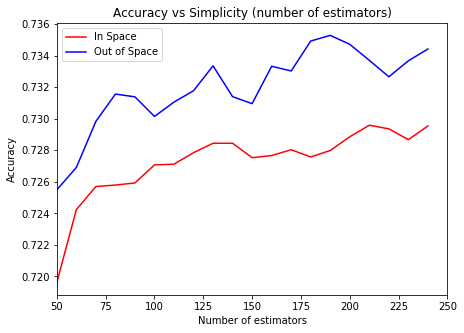

In [38]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(list(range(50,250,10)),ISAccuracy,'r',label='In Space')
plt.plot(list(range(50,250,10)),OSAccuracy,'b',label='Out of Space')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (number of estimators)")
plt.legend(loc='best')
plt.xlim(50,250)
plt.show()

In [43]:
# Best number:
bestnumberoftree=50+10*OSAccuracy.index(max(OSAccuracy))
bestnumberoftree

190

In [47]:
rf = RandomForestClassifier(n_estimators = bestnumberoftree, oob_score = True).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=rf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])

print('Out of bag score is:',round(rf.oob_score_,4))
print('Out of space score is:', round(OS_Acc,4))

Out of bag score is: 0.7283
Out of space score is: 0.7388


In [ ]:
#Takes forever to run
#from sklearn.tree import export_graphviz
#fn=X_test.columns[:-1]
#cn='choice'
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
#tree.plot_tree(rf.estimators_[0],
#               feature_names = fn, 
#               class_names=cn,
#               filled = True);
#fig.savefig('rf_individualtree.png')

In [ ]:
# Parameter importance plot, see which parameter is more important
# KNN for exploration

Second attempt using sklearn

In [71]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [72]:
data = pd.read_csv("trips.csv")
data

,HTAZ,ID,OTAZ,DTAZ,SameZone,TourID,SampleNo,SamplewithOD,age1,age2,...,new,New,man,ox,oy,dx,dy,Departure hr,Departure min,Second
0,377,52,377,425,0,300040311,3000403,300040303770425,0,0,...,True,1,0,40.751531,-73.899838,40.736918,-73.876352,7,0,25200
1,377,53,425,377,0,300040311,3000403,300040304250377,0,0,...,False,0,0,40.736918,-73.876352,40.751531,-73.899838,15,0,54000
2,1607,174,1607,1607,1,300074912,3000749,300074916071607,0,1,...,True,1,0,40.561232,-74.145414,40.561232,-74.145414,17,0,61200
3,1607,175,1607,1607,1,300074912,3000749,300074916071607,0,1,...,True,1,0,40.561232,-74.145414,40.561232,-74.145414,17,0,61200
4,1607,176,1607,12,0,300074921,3000749,300074916070012,0,1,...,True,1,1,40.561232,-74.145414,40.708519,-74.007126,6,15,22500
5,1607,177,12,1607,0,300074921,3000749,300074900121607,0,1,...,False,0,1,40.708519,-74.007126,40.561232,-74.145414,16,0,57600
6,873,268,873,839,0,300105911,3001059,300105908730839,0,0,...,True,1,0,40.868682,-73.894494,40.845941,-73.907804,9,50,35400
7,873,269,839,873,0,300105911,3001059,300105908390873,0,0,...,False,0,0,40.845941,-73.907804,40.868682,-73.894494,14,0,50400
8,873,270,873,967,0,300105912,3001059,300105908730967,0,0,...,True,1,0,40.868682,-73.894494,40.861388,-73.869308,16,30,59400
9,873,271,967,873,0,300105912,3001059,300105909670873,0,0,...,False,0,0,40.861388,-73.869308,40.868682,-73.894494,18,45,67500


In [73]:
data.columns

Index(['HTAZ', 'ID', 'OTAZ', 'DTAZ', 'SameZone', 'TourID', 'SampleNo',
       'SamplewithOD', 'age1', 'age2', 'age3', 'income1', 'income2', 'income3',
       'income4', 'work', 'TT_auto', 'Cost_driving', 'Cost_auto', 'Cost_Taxi',
       'TT_Taxi', 'TT_Walk', 'TT_Bike', 'WHT_FAC3', 'TT_pt', 'access',
       'egress', 'numTransfers', 'transferTime', 'pt_access', 'choice',
       'TT_carpool', 'Cost_carpool', 'Cost_Bike', 'Cost_Walk', 'pt', 'Cost_pt',
       'tsf', 'new', 'New', 'man', 'ox', 'oy', 'dx', 'dy', 'Departure hr',
       'Departure min', 'Second'],
      dtype='object')

In [56]:
FilterData=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice']].copy()
FilterData.head()

,ID,age1,age2,age3,income1,income2,income3,income4,work,TT_auto,...,egress,numTransfers,transferTime,pt_access,TT_carpool,Cost_Bike,Cost_Walk,Cost_pt,WHT_FAC3,choice
0,52,0,0,1,1,0,0,0,0,525.52,...,84.0,0,332,True,788.28,0,0,2.75,449.80,6
1,53,0,0,1,1,0,0,0,0,525.52,...,268.0,0,96,True,788.28,0,0,2.75,449.80,6
2,174,0,1,0,0,0,0,1,0,380.72,...,0.0,-1,0,False,571.08,0,0,0.00,206.13,6
3,175,0,1,0,0,0,0,1,0,380.72,...,0.0,-1,0,False,571.08,0,0,0.00,206.13,6
4,176,0,1,0,0,0,0,1,1,3994.30,...,124.0,2,525,True,5991.45,0,0,2.75,206.13,2


In [57]:
X_train,X_test,y_train,y_test=train_test_split(FilterData.iloc[:,1:-1], FilterData.iloc[:,-1], test_size=0.3, random_state=999)

In [58]:
clf = LogisticRegression(random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
IS_Acc=clf.score(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=clf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])
print('The in space accuracy is {} and the out of space accuracy is {}'.format(IS_Acc,OS_Acc))

d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The in space accuracy is 0.6781305319475084 and the out of space accuracy is 0.6690433323544919


In [59]:
predictions = clf.predict(X_test.iloc[:,:-1])
cm = metrics.confusion_matrix(y_test, predictions)

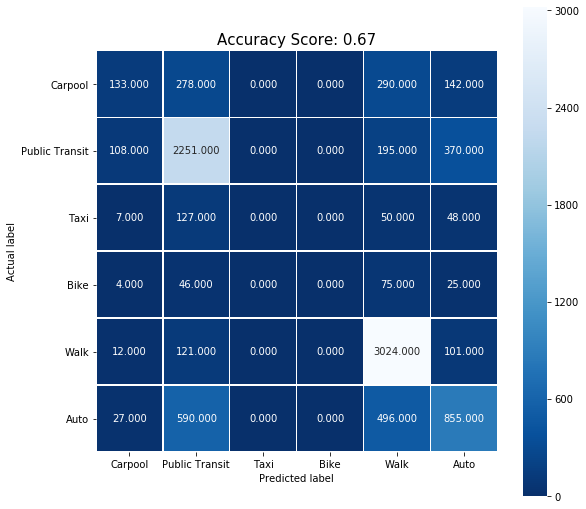

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.xticks(np.arange(6)+0.5, ('Carpool', 'Public Transit', 'Taxi', 'Bike', 'Walk','Auto'))
plt.yticks(np.arange(6)+0.5, ('Carpool', 'Public Transit', 'Taxi', 'Bike', 'Walk','Auto'),rotation=0)
all_sample_title = 'Accuracy Score: {0}'.format(round(OS_Acc,2))
plt.title(all_sample_title, size = 15);

0 = Carpool
1 = Public Transit
2 = Taxi
3 = Bike
4 = Walk
5 = Auto

It is very bad at predicting mode share... especially for Taxi and Bike trips
However, this might be still useful when perdicting mode share since logit model itselt is a random variable, it is not fair to only assigned highest probability!

In [67]:
Probability=clf.predict_proba(X_test.iloc[:,:-1])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.average(Probability[:,0],weights=X_test.iloc[:,-1])*100,2)
PT=round(np.average(Probability[:,1],weights=X_test.iloc[:,-1])*100,2)
Taxi=round(np.average(Probability[:,2],weights=X_test.iloc[:,-1])*100,2)
Bike=round(np.average(Probability[:,3],weights=X_test.iloc[:,-1])*100,2)
Walk=round(np.average(Probability[:,4],weights=X_test.iloc[:,-1])*100,2)
Auto=round(np.average(Probability[:,5],weights=X_test.iloc[:,-1])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 9.6,
public transit is 28.31,
Taxi is 2.17,
Bike is 1.65,
Walk is 36.51,
Auto is 21.76


Actually this is not to bad for normal regression

In [68]:
clf = LogisticRegression(multi_class='multinomial',solver ='newton-cg',random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
IS_Acc=clf.score(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=clf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])
print('The in space accuracy is {} and the out of space accuracy is {}'.format(IS_Acc,OS_Acc))

The in space accuracy is 0.6851280942320958 and the out of space accuracy is 0.6734185011206574


d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [69]:
predictions = clf.predict(X_test.iloc[:,:-1])
cm = metrics.confusion_matrix(y_test, predictions)

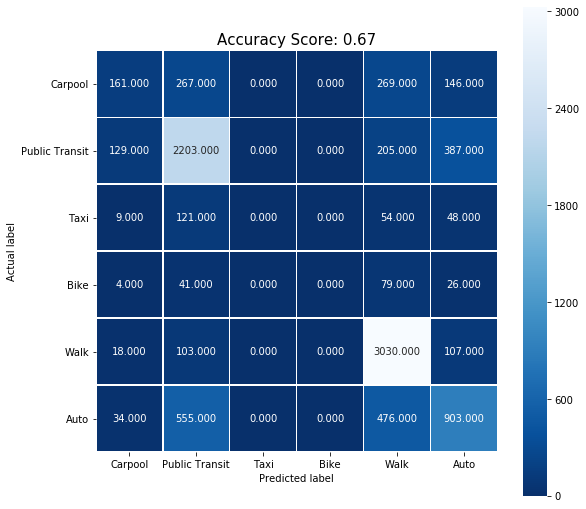

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.xticks(np.arange(6)+0.5, ('Carpool', 'Public Transit', 'Taxi', 'Bike', 'Walk','Auto'))
plt.yticks(np.arange(6)+0.5, ('Carpool', 'Public Transit', 'Taxi', 'Bike', 'Walk','Auto'),rotation=0)
all_sample_title = 'Accuracy Score: {0}'.format(round(OS_Acc,2))
plt.title(all_sample_title, size = 15);

In [12]:
Probability=clf.predict_proba(X_test.iloc[:,:-1])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.average(Probability[:,0],weights=X_test.iloc[:,-1])*100,2)
PT=round(np.average(Probability[:,1],weights=X_test.iloc[:,-1])*100,2)
Taxi=round(np.average(Probability[:,2],weights=X_test.iloc[:,-1])*100,2)
Bike=round(np.average(Probability[:,3],weights=X_test.iloc[:,-1])*100,2)
Walk=round(np.average(Probability[:,4],weights=X_test.iloc[:,-1])*100,2)
Auto=round(np.average(Probability[:,5],weights=X_test.iloc[:,-1])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 9.39,
public transit is 27.1,
Taxi is 2.07,
Bike is 1.6,
Walk is 39.07,
Auto is 20.77
